## Import Library

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('citrus.csv')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [9]:
df.info()
df.describe()
df['name'].value_counts()  # Cek distribusi label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


name
orange        5000
grapefruit    5000
Name: count, dtype: int64

## Eksplorasi Data (EDA)

In [10]:
df.info()
df.describe()
df['name'].value_counts()  # Cek distribusi label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


name
orange        5000
grapefruit    5000
Name: count, dtype: int64

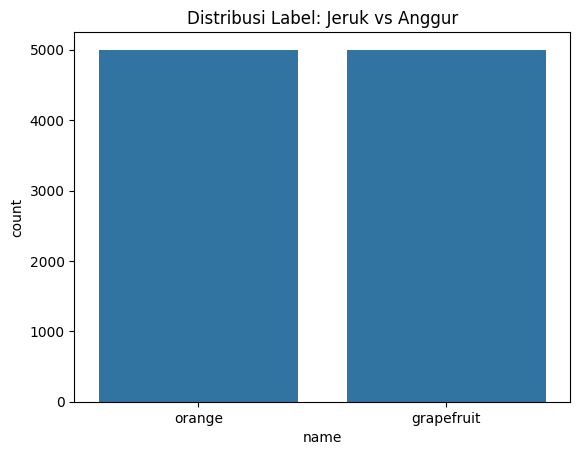

In [11]:
sns.countplot(x='name', data=df)
plt.title('Distribusi Label: Jeruk vs Anggur')
plt.show()

## Preprocessing Data

In [12]:
X = df.drop('name', axis=1)
y = df['name']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Membangun dan Melatih Model Naive Bayes

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

## Evaluasi Model

In [15]:
y_pred = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[933  67]
 [ 81 919]]

Classification Report:
               precision    recall  f1-score   support

  grapefruit       0.92      0.93      0.93      1000
      orange       0.93      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Akurasi: 0.926


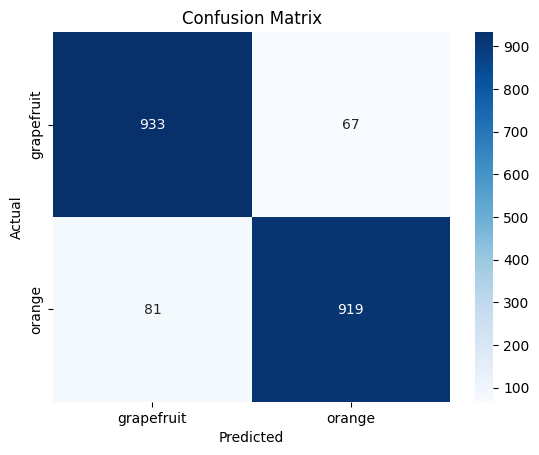

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()